# Topic 2 DQ 2

"Describe a scenario where the mean and median values of a dataset may differ significantly. What insights can be gained by examining this difference? Can you propose any solutions to handle this discrepancy? Additionally, how can Python be used to implement these solutions and what are some real-world examples of this phenomenon?"


### Real-World Examples
Economic Studies: Researchers analyze income or wealth distribution within countries to study economic inequality.

Real Estate: In housing markets, the sale prices of homes may be skewed by a few high-value transactions, affecting the average price more than the median price.

Internet Traffic: Websites or online services may have a skewed distribution of daily visitors, with a few days attracting significantly higher traffic due to special events or promotions.


### Skewness of the Distribution

A significant difference between the mean and median indicates a skewed distribution. If the mean is higher than the median, the distribution is right-skewed, suggesting that high-income individuals pull the average up.


### Solutions to Handle the Discrepancy

Use of Median for Central Tendency: In cases of skewed data, the median provides a better measure of central tendency than the mean, as it is less affected by extreme values.

Log Transformation: Applying a log transformation to the data can help reduce skewness, making the distribution more symmetric and bringing the mean and median closer together.

Trimmed Mean: Calculating a trimmed mean, where a certain percentage of the extreme values from both ends of the distribution are removed before calculating the mean, can also mitigate the impact of outliers.

In [62]:
import pandas as pd

data = pd.read_csv('Falcon 9 and Falcon Heavy launches .csv')

cleaned_mass = []

for mass in data['Payload_Mass']:
    try:
        # Attempt to remove commas and convert to float
        numeric_mass = float(mass.replace(",", ""))
        cleaned_mass.append(numeric_mass)
    except ValueError:
        # Handle the case where conversion fails
        print(f"{mass} is not a number.")
        cleaned_mass.append(None)

print(cleaned_mass)

No payload (excl. Dragon Mass) is not a number.
Classified (excl. Dragon Mass) is not a number.
Classified is not a number.
Classified is not a number.
5,000–6,000  is not a number.
Classified is not a number.
Unknown[d] is not a number.
Unknown is not a number.
Classified is not a number.
Unknown is not a number.
Classified is not a number.
Unknown is not a number.
[None, None, 525.0, 4700.0, 172.0, 4877.0, 500.0, 3170.0, 3325.0, 2296.0, 1316.0, 4535.0, 4428.0, 2216.0, 2395.0, 570.0, 4159.0, 1898.0, 4707.0, 1952.0, 2034.0, 553.0, 5271.0, 3136.0, 4696.0, 3100.0, 3600.0, 2257.0, 4600.0, 9600.0, 2490.0, 5600.0, 5300.0, None, 6070.0, 2708.0, 3669.0, 9600.0, 6761.0, 3310.0, 475.0, 4990.0, 9600.0, 5400.0, 3500.0, 2205.0, 9600.0, None, 4230.0, 2150.0, 6092.0, 9600.0, 2647.0, 362.0, 3600.0, 6460.0, 5384.0, 2697.0, 7075.0, 9600.0, 5800.0, 7060.0, 3000.0, 5300.0, 4000.0, 2500.0, 4400.0, 9600.0, 4850.0, 12055.0, 2495.0, 13620.0, 4200.0, 2268.0, 6500.0, 15600.0, 2617.0, 6956.0, 15600.0, 12050.0, 

In [63]:
cleaned_mass = []

for mass in data['Payload_Mass']:
    try:
        if "–" in mass:
            # Handle range values by calculating the average
            low, high = mass.replace(",", "").split("–")
            numeric_mass = (float(low) + float(high)) / 2
        else:
            numeric_mass = float(mass.replace(",", ""))
        cleaned_mass.append(numeric_mass)
    except ValueError:
        print(f"{mass} is not a number.")
        cleaned_mass.append(None) 

data['Payload_Mass'] = cleaned_mass

No payload (excl. Dragon Mass) is not a number.
Classified (excl. Dragon Mass) is not a number.
Classified is not a number.
Classified is not a number.
Classified is not a number.
Unknown[d] is not a number.
Unknown is not a number.
Classified is not a number.
Unknown is not a number.
Classified is not a number.
Unknown is not a number.


In [64]:
# Check the number of missing values
print(data['Payload_Mass'])
print(len(data['Payload_Mass']))

0          NaN
1          NaN
2        525.0
3       4700.0
4        172.0
        ...   
160      700.0
161     3500.0
162    16250.0
163    13570.0
164     2630.0
Name: Payload_Mass, Length: 165, dtype: float64
165


In [65]:

# Convert to a numpy array for easier statistical calculations
import numpy as np

# Remove None values
cleaned_mass_no_nan = [mass for mass in data['Payload_Mass'] if mass is not None]

# Remove NaN values
cleaned_mass_array = np.array(cleaned_mass_no_nan)
cleaned_mass_no_nan = cleaned_mass_array[~np.isnan(cleaned_mass_array)]


In [66]:
# Use the Interquartile Range (IQR) to identify outliers. 
#You can remove outliers or adjust them using transformations, we didn't need to. 

# Convert cleaned_mass_no_nan back to a pandas Series bc it's easier to calculate the IQR with pandas
cleaned_mass_series = pd.Series(cleaned_mass_no_nan)

# Calculate IQR on the cleaned series
Q1 = cleaned_mass_series.quantile(0.25)
Q3 = cleaned_mass_series.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = cleaned_mass_series[(cleaned_mass_series < (Q1 - 1.5 * IQR)) | (cleaned_mass_series > (Q3 + 1.5 * IQR))]

print(outliers)

Series([], dtype: float64)


In [67]:
# Identify outliers using Z-score
# We can use numpy to standardize the data and scipy to calculate the Z-scores.

import scipy.stats as stats

z_scores = np.abs(stats.zscore(cleaned_mass_series))
outliers_z = cleaned_mass_series[z_scores > 3]

print(outliers_z)

Series([], dtype: float64)


<Axes: >

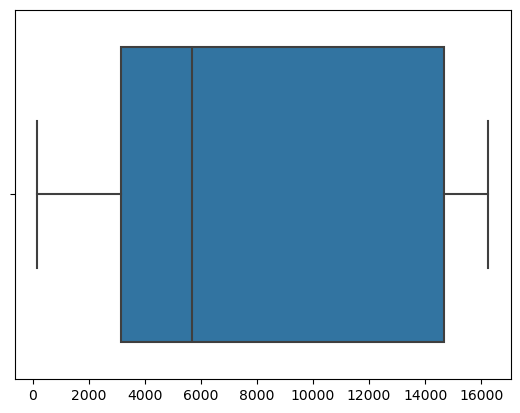

In [68]:
#Use seaborn for visual representation.
import seaborn as sns

sns.boxplot(x=cleaned_mass_series)

In [69]:
# Compute measures of central tendency and variability on the cleaned dataset.

mean_val = cleaned_mass_series.mean()
median_val = cleaned_mass_series.median()
std_dev = cleaned_mass_series.std()
print("Mean: " + str(mean_val))
print("Median: " + str(median_val))
print("Standard Deviation: " + str(std_dev))

Mean: 8187.11038961039
Median: 5700.0
Standard Deviation: 5686.167062578399


## Insights from Mean and Median Discrepancy

A significant difference between the mean and median in a dataset can occur in many real-world situations, especially in distributions that are skewed. For instance, if we consider the weights associated with SpaceX launches, where most launches might have a similar weight, but a few launches are exceptionally heavy or light due to additional requirements, this could result in a skewed distribution.

The discrepancy between mean and median values highlights the presence of outliers or a skewed distribution. By examining this difference, we can infer the skewness of the data. Right-Skewed (Positive Skewness) happens when the mean is greater than the median. Left-Skewed (Negative Skewness) happens when the mean is less than the median.

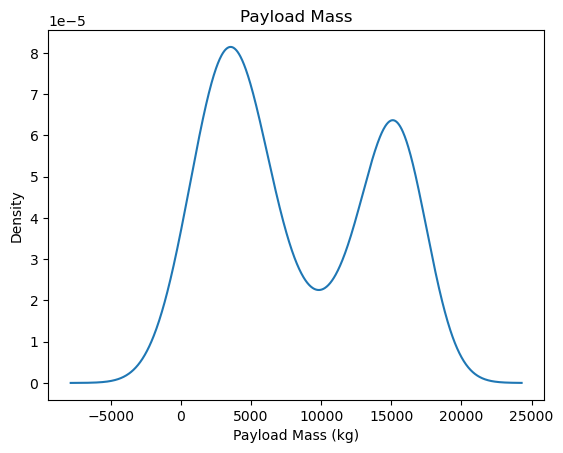

In [70]:
# Density Plot in matyplotlib
import matplotlib.pyplot as plt

cleaned_mass_series.plot(kind='density', title='Payload Mass')
plt.xlabel('Payload Mass (kg)')
plt.show()

 The density plot reveals two peaks, suggesting there might be two different groups or types of payloads within the dataset. The first peak is around 5,000 kg, and the second, larger peak is around 15,000 kg. The distribution is not symmetrical and indicates that the payload masses are not evenly distributed. The presence of two peaks could imply that there are two common payload mass configurations used in the launches, possibly relating to different mission types or payload capacities.

## Solutions to Handle Discrepancy
Use Median: For skewed data, the median can provide a better sense of the "central" value because it is less affected by outliers or extreme values than the mean. 

Data Transformation: Applying transformations to normalize the data. (Examples below!)

Robust Statistical Methods (like MAD) Use statistical techniques that are less sensitive to outliers. 

In [71]:
#For data transformation, you can apply a log transformation to normalize skewed data.

cleaned_mass_series_log = np.log(cleaned_mass_series + 1)  # Adding 1 to avoid log(0) :) 

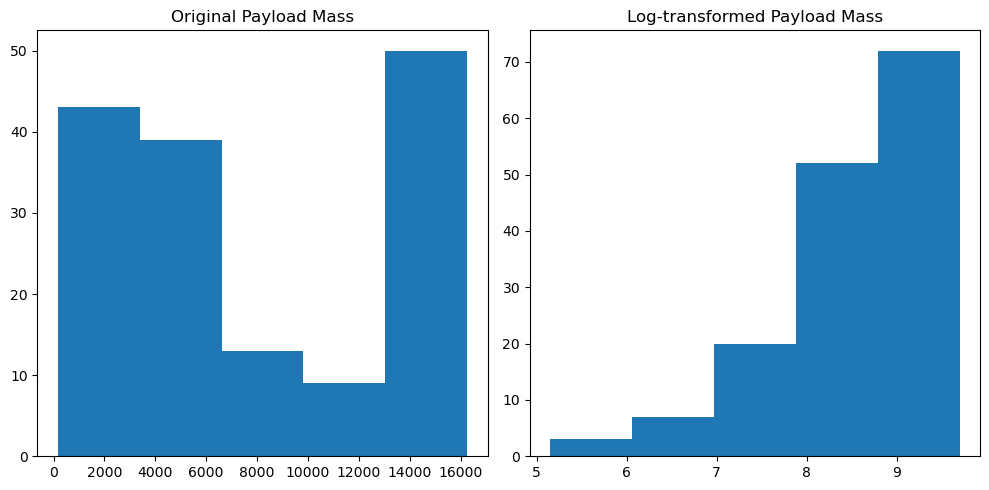

In [72]:
# Plotting the original and log-transformed data
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(cleaned_mass_series, bins=5)
plt.title('Original Payload Mass')

plt.subplot(1, 2, 2)
plt.hist(cleaned_mass_series_log, bins=5)
plt.title('Log-transformed Payload Mass')

plt.tight_layout()
plt.show()

Applying transformations like log transformation (replaces each variable in a dataset with its natural logarithm) helps normalize skewed data, making it more symmetrical. This can improve the performance of statistical analyses and machine learning models that assume data is normally distributed. Normalization can also stabilize variance, making patterns more apparent and results more reliable.


The two histograms compare the distribution of payload masses before and after a log transformation. The original data shows a right-skewed distribution with a concentration of values on the lower end, suggesting a few very high values (outliers). The log-transformed data shows a more symmetrical distribution, indicating that the log transformation has normalized the data, reducing the skewness and the impact of high-value outliers. This transformation makes the data more suitable for analyses that assume normality.

In [73]:
#For robust statistical methods, the median absolute deviation (MAD) is less sensitive to outliers than standard deviation:

MAD = np.median(np.abs(cleaned_mass_series - median_val))
print("Median Absolute Deviation: " + str(MAD))

Median Absolute Deviation: 3900.0


The Median Absolute Deviation (MAD) is a robust statistic used to estimate variability within a dataset, particularly its dispersion or spread. Unlike the standard deviation, which can be heavily influenced by outliers or extreme values in the data, MAD is less sensitive to such anomalies. This characteristic makes MAD especially useful in situations where the data may not follow a normal distribution.

### Sources 

Coleman, S. (n.d.). SpaceX Launch Data. Kaggle. Retrieved Feb 2024, from https://www.kaggle.com/datasets/scoleman/spacex-launch-data?rvi=1

Kaur, J. (2019). Detecting outliers: Use absolute deviation around the median but do not use standard deviation around the mean. Journal of Emerging Technologies and Innovative Research (JETIR), 6(3). Retrieved from www.jetir.org (ISSN-2349-5162)

Rogel-Salazar, J. (2023). Definitely Maybe: Probability and Distributions. In Statistics and data visualisation with Python (1st ed.). CRC Press.

Zequera RAG, Rassolkin A, Vaimann T, Kallaste A. Clustering and Outlier Analysis for Key Performance Indicators in Battery Energy Storage Systems applications. 2023 IEEE 17th International Conference on Compatibility, Power Electronics and Power Engineering (CPE-POWERENG), Compatibility, Power Electronics and Power Engineering (CPE-POWERENG), 2023 IEEE 17th International Conference on. June 2023:1-6. doi:10.1109/CPE-POWERENG58103.2023.10227417

This Jupiter notebook was created with the help of shcolarly articles given by ChatGPT4. (2024)